In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [13]:

# load data
(x,y),(x_test,y_test)=mnist.load_data()
x_train= x[:50000]
y_train= y[:50000]

x_val= x[50000:]
y_val= y[50000:]


print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')





x_train shape: (50000, 28, 28)
y_train shape: (50000,)
x_val shape: (10000, 28, 28)
y_val shape: (10000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [19]:
model = Sequential([
  Conv2D(filters=8,kernel_size = (3,3), activation='relu', input_shape=(28,28,1)),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(128,activation='relu'),
  Dense(64,activation='relu'),
  Dense(32,activation='relu'),
  Dense(16,activation='relu'),
  Dense(10,activation='softmax')
])

model.summary(show_trainable=True)
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_val,y_val))


/home/silicon/opencv_learn/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d_1 (Conv2D)           │ (None, 26, 26, 8)     │         80 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_1             │ (None, 13, 13, 8)     │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten_4 (Flatten)         │ (None, 1352)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_21 (Dense)            │ (None, 128)           │    173,184 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_22 (Dense)            │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_23 (Dense)            │ (None, 32)            │      2,080 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_24 (Dense)            │ (None, 16)            │        528 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_25 (Dense)            │ (None, 10)            │        170 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 184,298 (719.91 KB)

 Trainable params: 184,298 (719.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7999 - loss: 1.0368 - val_accuracy: 0.9571 - val_loss: 0.1422
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9706 - loss: 0.1011 - val_accuracy: 0.9654 - val_loss: 0.1191
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9798 - loss: 0.0671 - val_accuracy: 0.9784 - val_loss: 0.0839
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9861 - loss: 0.0463 - val_accuracy: 0.9757 - val_loss: 0.1061
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9875 - loss: 0.0427 - val_accuracy: 0.9784 - val_loss: 0.0874
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9910 - loss: 0.0307 - val_accuracy: 0.9782 - val_loss: 0.0965
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9906 - loss: 0.0296 - val_accuracy: 0.9763 - val_loss: 0.1153
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9931 - loss: 0.0242 - 

In [18]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9695 - loss: 0.1373


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Predicted digit: 6


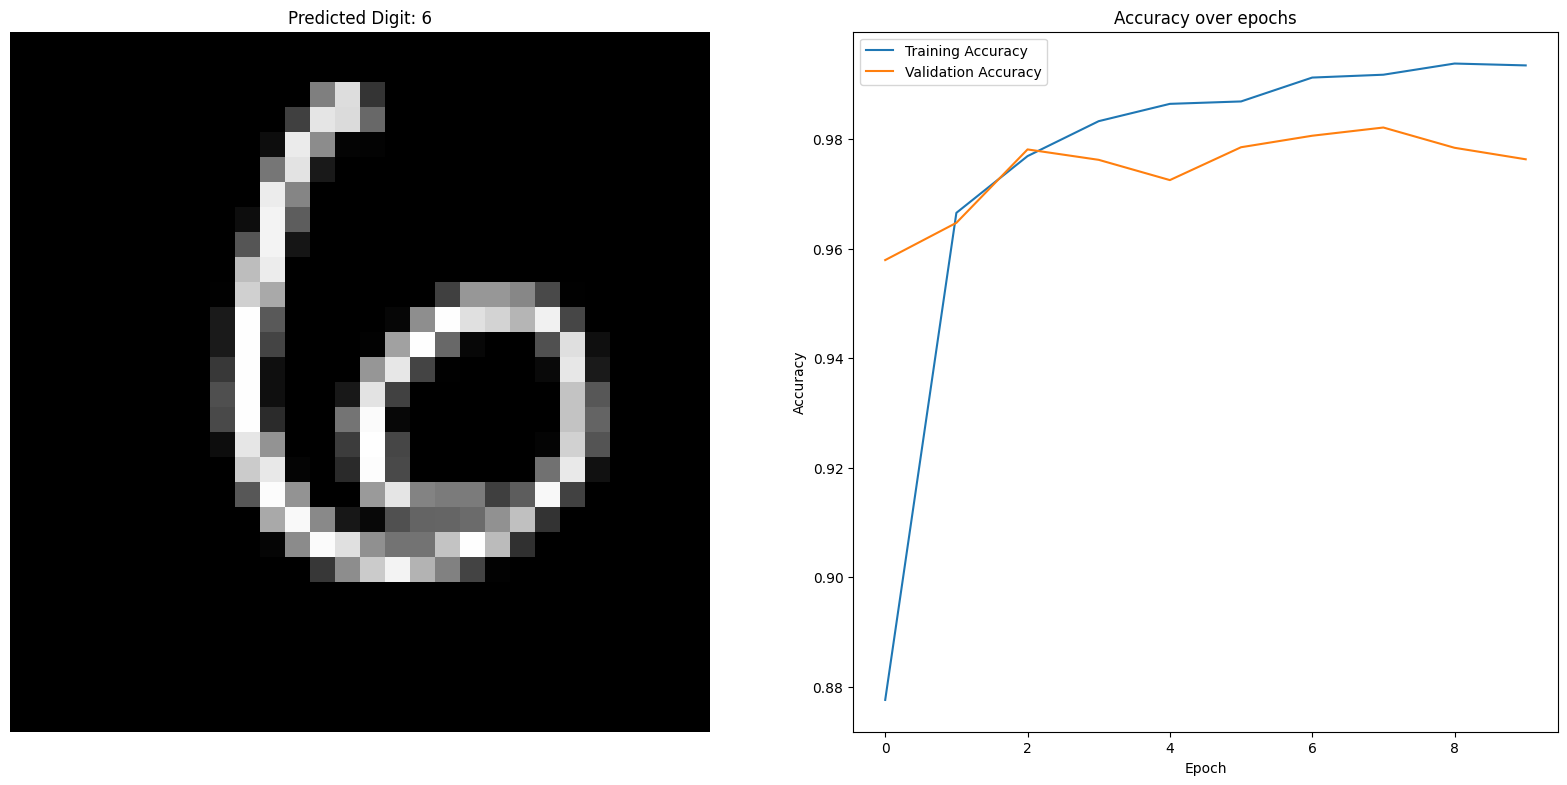

In [16]:

# visualize a sample

test_image = x_test[100] 

prediction = model.predict(test_image[np.newaxis, ...])
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)

plt.figure(figsize=(20,20))
plt.subplot(2,2,1)
plt.imshow(test_image, cmap='gray')
plt.title(f'Predicted Digit: {predicted_label}')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.show()
